In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the text file
file_path = "/content/total_results.txt"  # Replace with the path to your txt file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the header (assuming it's the second line in the file)
headers = lines[1].split()  # Adjust index if headers are in a different line

# Initialize an empty list to hold the data rows
analysis = []
sr = []
o = []
b = []
db = []
s = []
ds = []
s95obs = []
s95exp = []
robscons = []
rexpcons = []
# Iterate through the rest of the lines and split them into data columns
for line in lines[1:]:  # Skip the first two lines (assumed as header and index rows)
    columns = line.split()
    #print(columns)
    analysis.append(str(columns[0]))
    sr.append(str(columns[1]))
    o.append(float(columns[2]))
    b.append(float(columns[3]))
    db.append(float(columns[4]))
    s.append(float(columns[5]))
    ds.append(float(columns[6]))
    s95obs.append(float(columns[7]))
    s95exp.append(float(columns[8]))
    robscons.append(float(columns[9]))
    rexpcons.append(float(columns[10]))

df = pd.DataFrame({
    'analysis' : analysis,
    'sr': sr,
    'o': o,
    'b': b,
    'db': db,
    's': s,
    'ds': ds,
    's95obs': s95obs,
    's95exp': s95exp,
    'robscons': robscons,
    'rexpcons': rexpcons

})
df_filtered = df[(df['robscons'] != 0) | (df['rexpcons'] != 0)]

df_filtered = df_filtered[
    (df_filtered['robscons'] >= 0.87) & (df_filtered['robscons'] <= 1.3) |
    (df_filtered['rexpcons'] >= 0.87) & (df_filtered['rexpcons'] <= 1.3)
]
print(df_filtered['analysis'])

196    atlas_1807_07447
552    atlas_1807_07447
632    atlas_1807_07447
Name: analysis, dtype: object


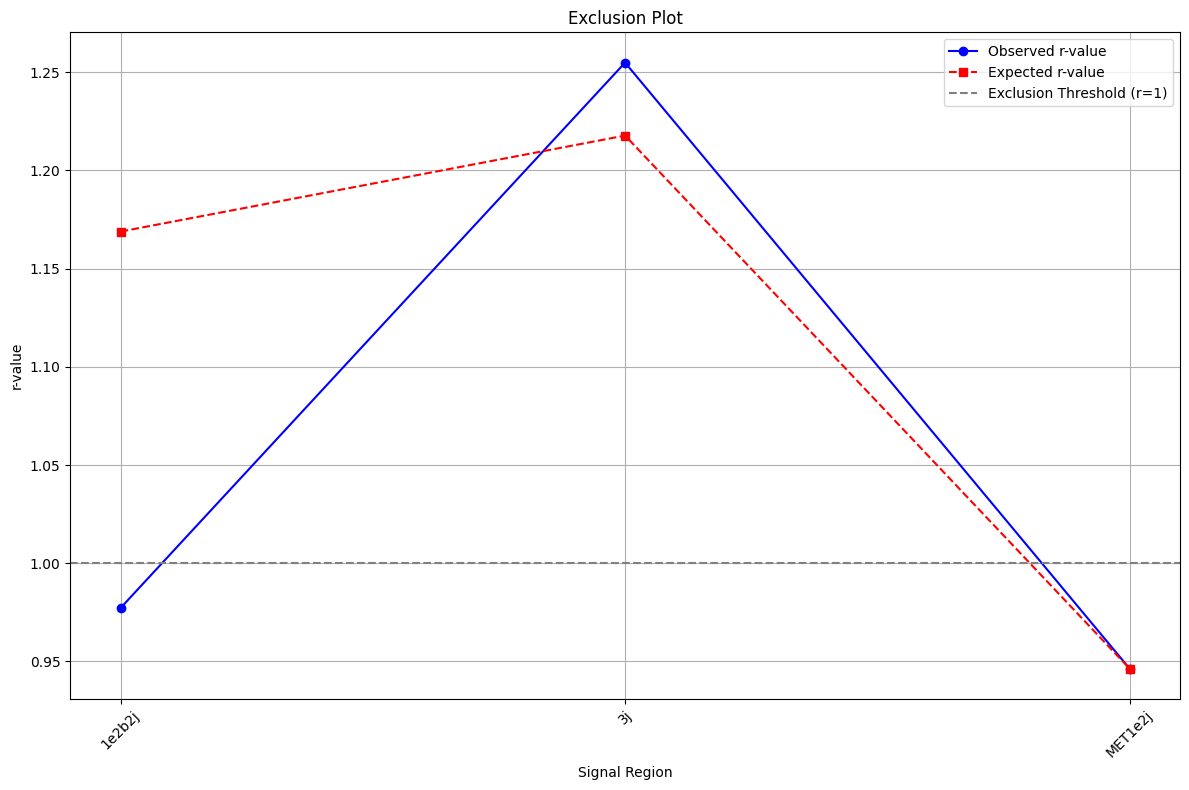

In [41]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Observed r-values
ax.plot(df_filtered['sr'], df_filtered['robscons'], 'o-', label='Observed r-value', color='blue')

# Plot Expected r-values
ax.plot(df_filtered['sr'], df_filtered['rexpcons'], 's--', label='Expected r-value', color='red')

# Add horizontal line for exclusion threshold
ax.axhline(y=1, color='gray', linestyle='--', label='Exclusion Threshold (r=1)')

# Labeling
ax.set_xlabel('Signal Region')
ax.set_ylabel('r-value')
ax.set_title('Exclusion Plot')
ax.legend()
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()